<img src="../fasp/runner/credits/images/FASPNotebook15.png" style="float: right;">

### GTEX Example - Google Cloud
This notebook computes on GTEX version 8 files on Google Cloud Platform. 

In this case the DRS ids of the GTEX files are available via a client which access a local manifest file. The manifest file is obtained from Anvil as follows.
https://anvilproject.org/learn/reference/gtex-v8-free-egress-instructions

Rather than use the Gen3 Downloader described in the egress instructions, this example uses the Anvil DRS service to obtain URLs which can be passed to the Google Cloud Pipeline.

Note also the instructions refer to free egress which is only possible via the AWS platform.

In this case the compute is performed on the Google Cloud copy of the data using Google compute. No egress charges are incurred, however it is necessary to provide a billing project in order that a URL can be generated. 

In [3]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.search import Gen3ManifestClient
from fasp.loc import anvilDRSClient
from fasp.workflow import GCPLSsamtools

faspRunner = FASPRunner()

# Step 1 - Discovery
# Search client to access manifest downloaded from Anvil
searchClient = Gen3ManifestClient('../fasp/data/gtex/gtex-cram-manifest.json')



Running FASPNotebook15-GTEXExample-GCP.ipynb


Note that the configuration of the Anvil DRS Client includes the billing project to which any charges would be applied.

In [4]:
settings = faspRunner.settings

drsClient = anvilDRSClient('~/.keys/anvil_credentials.json', settings['GCPProject'], 'gs')

location = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
workflowClient = GCPLSsamtools(location, settings['GCPOutputBucket'])

faspRunner.configure(searchClient, drsClient, workflowClient)

faspRunner.runQuery(3, 'Anvil GTEX Test')


Running query
3
subject=GTEX-1GTWX-0001-SM-7J3A5.cram, drsID=dg.ANV0/76bb893d-12da-41ca-8828-ff89551d3e15
workflow submitted, run:10465117703135878315
____________________________________________________________
subject=GTEX-14PQA-0003-SM-7DLH4.cram, drsID=dg.ANV0/66352de8-4b50-4cae-881d-b76d03df5ac8
workflow submitted, run:14490116891816357479
____________________________________________________________
subject=GTEX-1B98T-0004-SM-7J38T.cram, drsID=dg.ANV0/ed9ac9ae-02da-4e97-93da-ad86aa77d227
workflow submitted, run:2471317949033701719
____________________________________________________________


[{'subject': 'GTEX-1GTWX-0001-SM-7J3A5.cram',
  'run_id': '10465117703135878315'},
 {'subject': 'GTEX-14PQA-0003-SM-7DLH4.cram',
  'run_id': '14490116891816357479'},
 {'subject': 'GTEX-1B98T-0004-SM-7J38T.cram', 'run_id': '2471317949033701719'}]

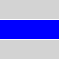

In [5]:
faspRunner.getFASPicon()